Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [32]:
import pandas as pd

In [33]:
#city bikes algira csv
df1 = pd.read_csv('algira.csv')


In [34]:
#foursquare csv
df2 = pd.read_csv('foursquare.csv')

In [35]:
#yelp csv
df3 = pd.read_csv('yelp.csv')

In [36]:
#join df1 and df2
merged_df = pd.merge(df1, df2, on='name', how='outer')

#join result with df3
final_df = pd.merge(merged_df, df3, on='name', how='outer')

print(final_df)

    Unnamed: 0_x                                               name  \
0            NaN                                        3A É de Vez   
1            NaN                            Aida M Soares Conceição   
2            NaN                     Alcindo J. N. Pereira Monteiro   
3            NaN                               Antonio Fidalgo Rosa   
4            NaN                         António F Fernandes Virgas   
..           ...                                                ...   
85           NaN                                           Tecniart   
86           NaN                                            Titanic   
87           NaN                     Turma dos Desejos - Unipessoal   
88           NaN  Venercom, Comércio e Representações de Produto...   
89           NaN                           Vânia Lopes - Unipessoal   

    longitude  latitude  Unnamed: 0_y                 category_x      lat_x  \
0         NaN       NaN           4.0                        Bar  39

In [86]:
print(final_df.columns)

Index(['Unnamed: 0_x', 'name', 'longitude', 'latitude', 'Unnamed: 0_y',
       'category_x', 'lat_x', 'lng_x', 'Unnamed: 0', 'category_y', 'lat_y',
       'lng_y', 'category'],
      dtype='object')


In [83]:
# Combine category_x and category_y into a single 'category' column
final_df['category'] = final_df['category_x'].combine_first(final_df['category_y']).fillna('Unknown').astype(str)

In [84]:
print(final_df['category'].head())
print(final_df['category'].unique())

0         Bar
1        Café
2        Café
3        Café
4    Wine Bar
Name: category, dtype: object
['Bar' 'Café' 'Wine Bar' 'Bars' 'Arts and Entertainment' 'Unknown'
 'Beer Garden' 'Tea Room' 'Night Club' 'Art Restoration Service'
 'Event Service' 'Real Estate Agents' 'Coffee Shop'
 'Food and Beverage Service']


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

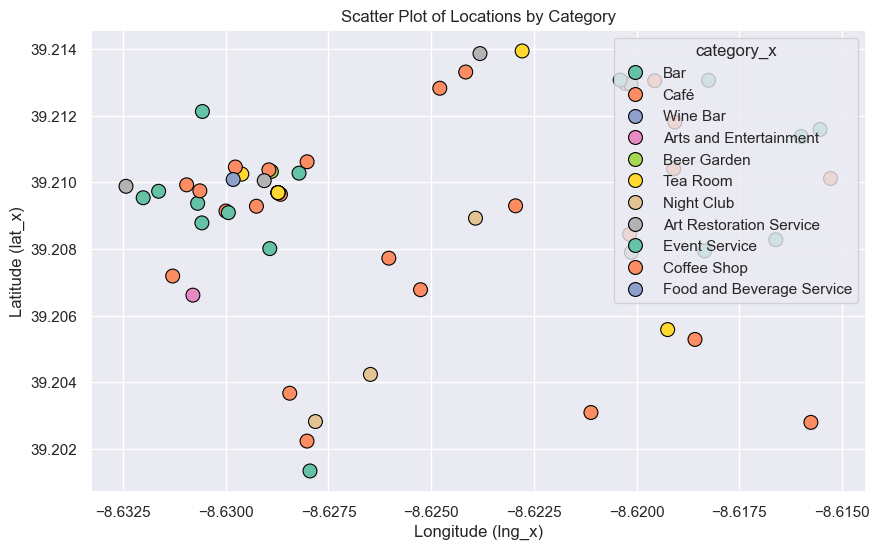

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

category_column = 'category_x'

unique_categories = final_df[category_column].nunique()
palette = sns.color_palette("Set2", n_colors=unique_categories)

#create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='lng_x', y='lat_x', hue=category_column, palette=palette, s=100, edgecolor='black')

# customize plot
plt.title('Scatter Plot of Locations by Category')
plt.xlabel('Longitude (lng_x)')
plt.ylabel('Latitude (lat_x)')
plt.legend(title=category_column, loc='upper right')
 
plt.show()

Visualization indicates higher density grouping of categories around the latitude 39.210 and longitude range of -8.6325 to -8.6275. This is noteworthy when reviewing the full plot as this is the only location indicating this type of higher density on this plot. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [ ]:
connection = create_connection("sm_app.sqlite")

In [ ]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [ ]:
create_users_table = """
CREATE TABLE IF NOT EXISTS users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  age INTEGER,
  gender TEXT,
  nationality TEXT
);
"""

Look at the data before and after the join to validate your data.